### Project submission for upgrad assignment:
Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


## Assumptions:
As per the problem statement:
- setting batch size of 32 at all places
- setting number of epochs as 20 at all places
- in the final training as mentioned using 30 epochs

- i have stored the zip file on my google drive - then my drive and inside CNN_Assignment folder.

**the zip file needs to be uploaded again in drive after augmentation as otherwise the previously created instances wont be removed**

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# importing neccessary modules for processing
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
# since we have a zipped file in the drive hence unzipping it for the usage
!unzip -q /content/gdrive/My\ Drive/CNN_Assignment/CNN_assignment
!ls
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

 gdrive       'Skin cancer ISIC The International Skin Imaging Collaboration'
 sample_data
Test  Train


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
## Todo: Update the paths of the train and test dataset

# Defining the path for train and test files in the drive
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
# printing total number of images available
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
# defining the batch size as specified by the requirements of the notebook --
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


-*Steps performed above / the parameters used (for train dataframe purpose):

1. since the training is to be done on the tran dataset hence passing the name of the dataframe 'data_dir_train' in the first parameter

2. as specified by the assignment seed is 123

3. since for validation 20% of data is to be kept hence specifying the value

4. subset to specify the portion for the trianing purpose

5. image size , as the image should be in the form of a 180x180 form hence specifying the size

6. batch size for specifying the size of batches of data

**NOTE** we have the 80% as the trianing dataframe and the remaining goes for the training purposes

hence the line says that 1792 files are being used for the training purposes.

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size) ##todo

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


-*Steps performed above / the parameters used (for Validation purpose):

1. since the training is to be done on the tran dataset hence passing the name of the dataframe 'data_dir_train' in the first parameter

2. as specified by the assignment seed is 123

3. since for validation 20% of data is to be kept hence specifying the value

4. subset to specify the portion for the validation purpose

5. image size , as the image should be in the form of a 180x180 form hence specifying the size

6. batch size for specifying the size of batches of data

**NOTE** we have the 80% as the trianing dataframe and the remaining goes for the training purposes

hence the line says that 1792 files are being used for the training purposes.

In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
for i in class_names:
  print(i)

actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

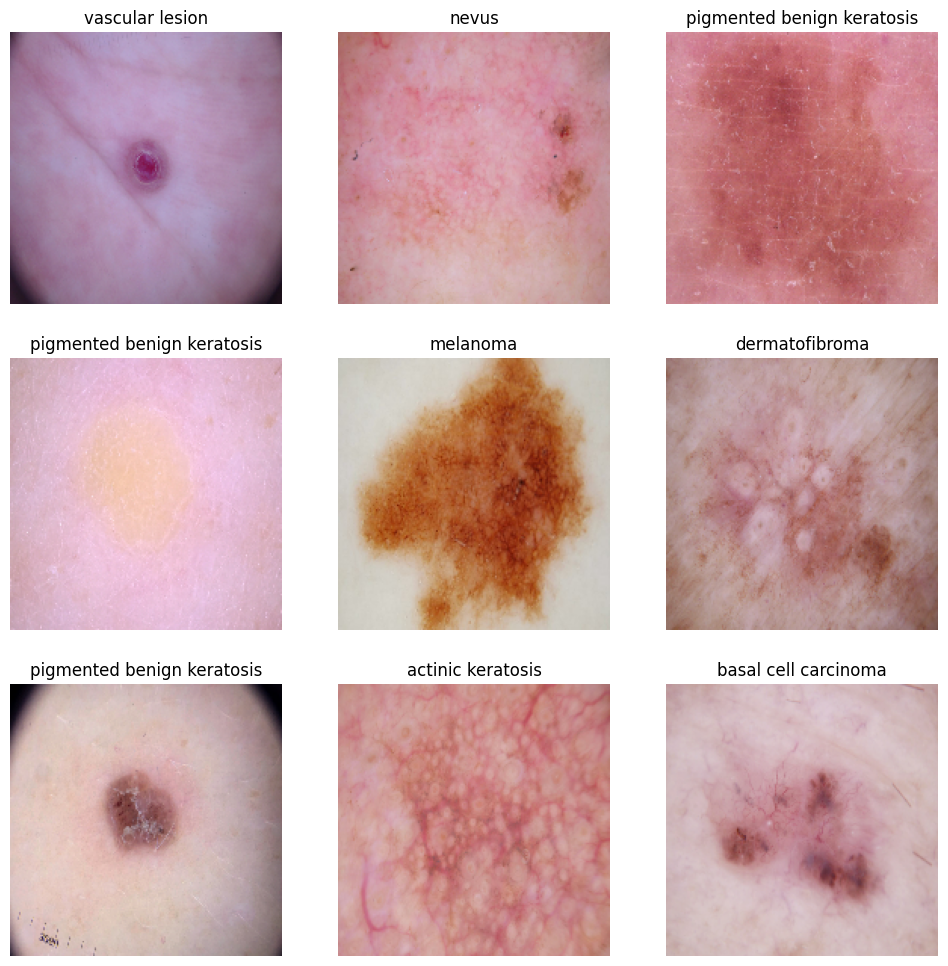

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
# setting a figure size
plt.figure(figsize = (12, 12))
for image, label in train_ds.take(1):
  # this will create dataframe with one perticular entry
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    # since there are 9 labels hence building a 9x9 subplot to see all the images
    # also providing the index as per i value
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

- I am using Relu activtion function as it is a non-linear activation function, which can handle the classification much better in the case of the skin cancer spots
- hence it will speed up the training process and will give better results

In [12]:
#creating a basic version of the model to create the cnn model
# a variable for defining the number of classes :
nclass = 9

# building a base model:
cnnm = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling th eRGB channel
  # adding first convolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # using Flatten, so that it returns a one dimentional data
  layers.Flatten(),

  # using Dense with relu activation function
  layers.Dense(64, activation='relu'),
  layers.Dense(nclass)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
# using adam optimiser for compilation because of its adaptive learning rate capabilities
cnnm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
cnnm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [15]:
epochs = 20
history = cnnm.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 105ms/step - loss: 2.0416 - accuracy: 0.2059 - val_loss: 1.9520 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.9754 - accuracy: 0.2517 - val_loss: 1.8901 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.7965 - accuracy: 0.3248 - val_loss: 1.6317 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5619 - accuracy: 0.4392 - val_loss: 1.5078 - val_accuracy: 0.4676
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5289 - accuracy: 0.4660 - val_loss: 1.4864 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4049 - accuracy: 0.4989 - val_loss: 1.6815 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3428 - accuracy: 0.5128 - val_loss: 1.4125 - val_accuracy: 0.5123
Epoch 8/20


**-- Observation --**
* from the epoch result we can see that the **accuracy** is good according to the results
* But , cant say the same for the **validation** the validation accuracy is not near to the accuracy
* so model needs further improvements

Lets visualize the results of accuracy and the validation accuracy to see what might be the cause.


### Visualizing training results

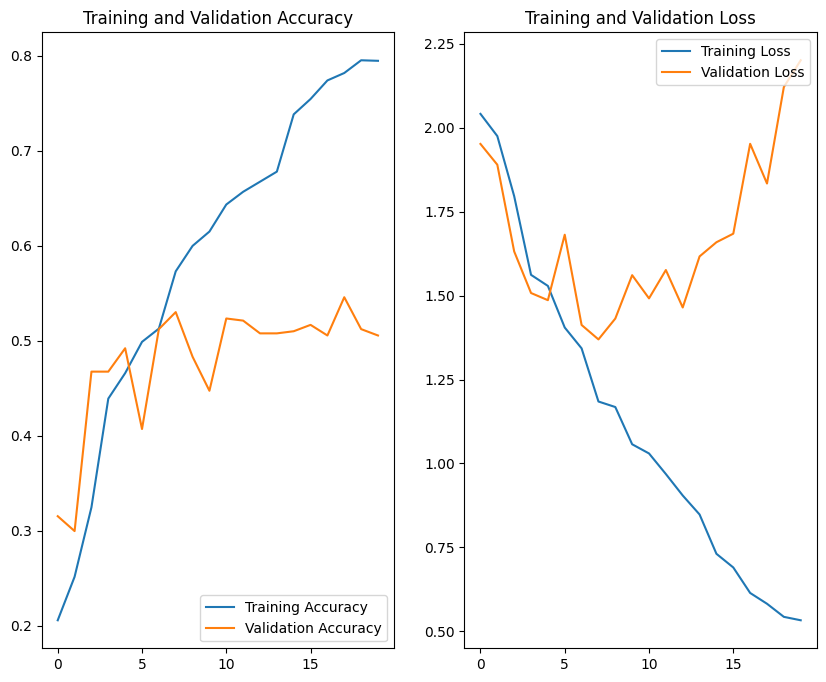

In [16]:
# to compare the accuracy and the validation accuracy extracting those values form 'history'

# extracting model accuracy
acc = history.history['accuracy']
#extracting validation accuracy
val_acc = history.history['val_accuracy']
# extracting loss
loss = history.history['loss']
# extracting validation loss
val_loss = history.history['val_loss']

# no. of points to plot = no. of epochs
epochs_range = range(epochs)

#plotting the graph of training accuracy compared with validation accuracy on subplot axis 1
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plotting the graph of training loss compared with validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**-Observations-**
- **Training accuracy vs Validation accuracy:**
     1. as we can see that the training acuracy keeps on increasing
     2. But it is not the same for the validation accuracy
- **Training loss vs Validation loss:**
     1. we can see that the training loss is dropping which is a good sign
     2. but on the other hand the validation los is increasing

 ### **From the above observations we can conclude that the models shows clear signs of overfitting and needs to be tuned / improved.**

 One main reason for this can be because of imbalance of classes available, we can try to improvise this by providing more inputs to learn hence improving learning
 - we can apply different transformations of rotation, zoom or flipping
 - This will give model much more variation to learn from

In [17]:
#data augumentation

data_ag = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)), # flipping image horizontally
    layers.experimental.preprocessing.RandomRotation((0.1,0.2)), # rotating of image (range 10% to 30%)
    layers.experimental.preprocessing.RandomZoom((0.1,0.2)) # zooming of image (range 10 % to 30 %)
  ]
)

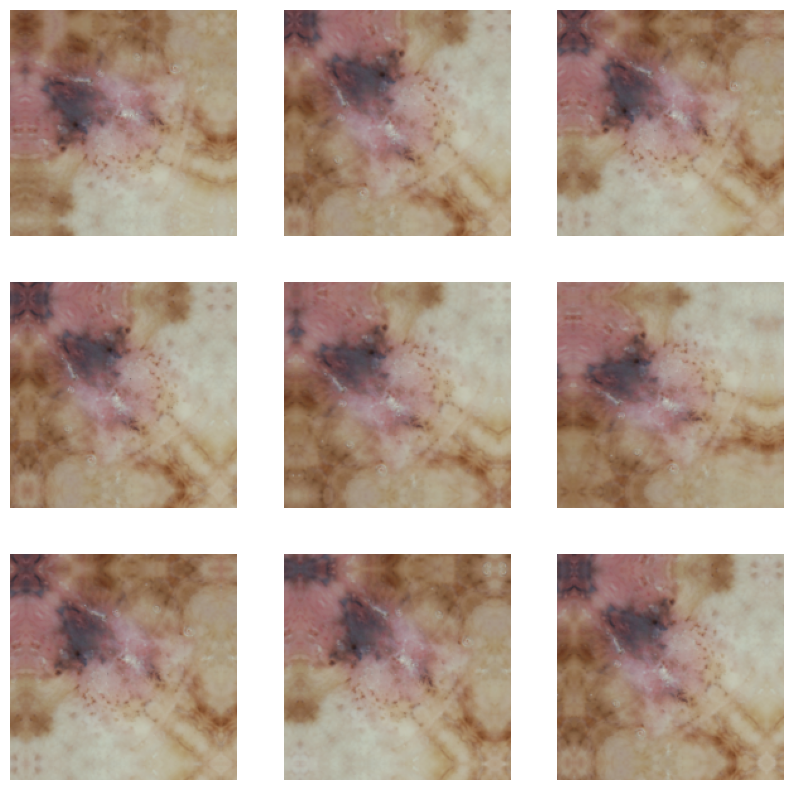

In [18]:
# visualizing how augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt
# visualizing on one instance of the image:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    ag_images = data_ag(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(ag_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

cnnm = Sequential([data_ag,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling th eRGB channel
  # adding first convolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding fourth convolution layer
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # conversion to one dimention
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  # number of classes stored in nclass
  layers.Dense(nclass)
])


### Compiling the model

In [20]:
# using adam optimiser for compilation because of its adaptive learning rate capabilities
cnnm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
# taining model using epoch = 20
epochs = 20
history = cnnm.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 27ms/step - loss: 1.9586 - accuracy: 0.2500 - val_loss: 1.8342 - val_accuracy: 0.3132
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6832 - accuracy: 0.3867 - val_loss: 1.5778 - val_accuracy: 0.4609
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.6140 - accuracy: 0.4135 - val_loss: 1.5741 - val_accuracy: 0.4497
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5104 - accuracy: 0.4604 - val_loss: 1.5037 - val_accuracy: 0.4564
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4541 - accuracy: 0.4883 - val_loss: 1.4153 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3706 - accuracy: 0.5279 - val_loss: 1.4287 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3651 - accuracy: 0.5201 - val_loss: 1.3667 - val_accuracy: 0.5123
Epoch 8/20
56

### Visualizing the results

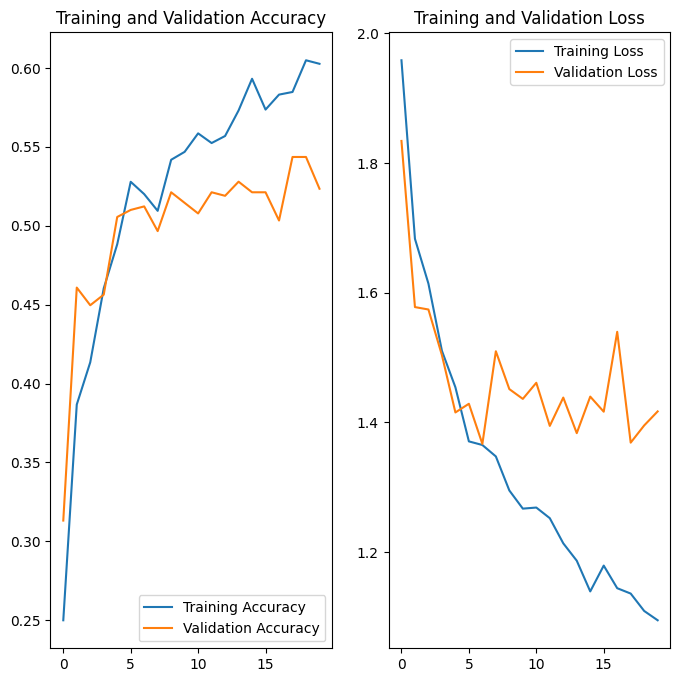

In [22]:
# storing the above training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# storing the above training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# accuracy comarision
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# loss comparision
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Yes, we do see there is a slight improvement in the model performance, but it is also observed that the training accuracy has dropped a lot as compared to previous result.**
Although the training acuracy is close to validatio accuracy, the performance is low copared to previous results

Will apply dropouts also for reducing any redundancy.

## Building the model with dropouts:

In [23]:
# building the model with dropouts and few extra layers if needed
cnnm = Sequential([data_ag,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling th eRGB channel
  # adding first convolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding fourth convolution layer
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding a dropout layr as it is benificial to keep check of redundancies in data
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  # number of classes  = nclass
  layers.Dense(nclass)
])


In [24]:
# compilation
cnnm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# epochs
history = cnnm.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 35ms/step - loss: 2.0639 - accuracy: 0.1970 - val_loss: 2.0350 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 2.0324 - accuracy: 0.2121 - val_loss: 2.0395 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 31ms/step - loss: 1.9004 - accuracy: 0.2963 - val_loss: 1.8135 - val_accuracy: 0.3535
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7382 - accuracy: 0.3627 - val_loss: 1.6872 - val_accuracy: 0.3937
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6470 - accuracy: 0.4163 - val_loss: 1.6005 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4992 - accuracy: 0.4727 - val_loss: 1.5204 - val_accuracy: 0.4899
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4558 - accuracy: 0.4911 - val_loss: 1.4423 - val_accuracy: 0.5190
Epoch 8/20
56

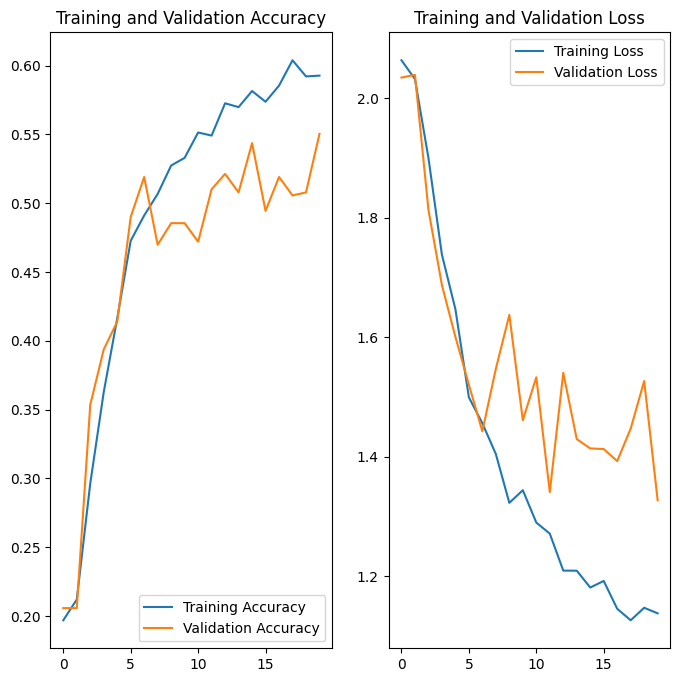

In [26]:
# vizualization of performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We do not observe an remarkable change

- In such real world data there is one more factor to take into account and that is class imbalance
- it might be the case that all the classes are not distributed evenly
- in turn the model has a less chance to learn about the minority classes properly
- it becomes important to check what is the distribution of classes in the data.

### Checking presence of any class imbalance:

In [27]:
# to solve the purpose we need to create a dataframe for the provided files.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)
# we are saving the path along with the image name as a singele instance so that it can be saced in one single dataframe
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,nevus
2235,Skin cancer ISIC The International Skin Imagin...,nevus
2236,Skin cancer ISIC The International Skin Imagin...,nevus
2237,Skin cancer ISIC The International Skin Imagin...,nevus


Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=8, n=139 (6.208%)
Class=7, n=181 (8.084%)
Class=0, n=114 (5.092%)
Class=4, n=357 (15.945%)


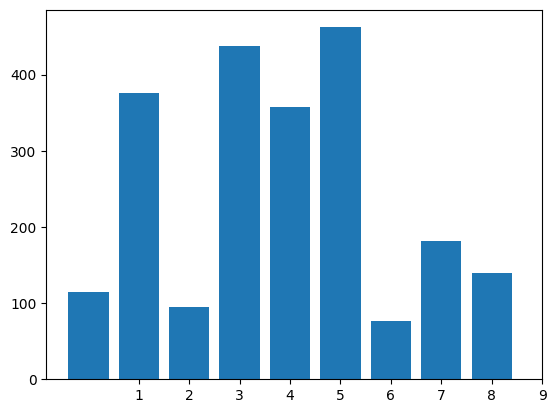

In [28]:
# plotting a graph to see the spread of different classes throughout in the dataframe
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.xticks(range(1,10))
plt.show()

#### **Todo:** Write your findings here:
**we do see that there is class imbalance in case of few of the classes**
#### - Which class has the least number of samples?
**for the record the least number of instances is in class 6**
#### - Which classes dominate the data in terms proportionate number of samples?
**class 5 is having the highest no. of instances followed by 3, 1 and 4**

As we saw that the overfitting was lowered with the data augumentation, but as we see there is class imbalance we need to balance it for better results.


- We will add 500 instances using the augumentor and hence all the classes will get a more resonable amout to learn .


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF91C43EE60>: 100%|██████████| 500/500 [00:19<00:00, 25.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF9B10FF970>: 100%|██████████| 500/500 [00:19<00:00, 25.23 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF91C500130>: 100%|██████████| 500/500 [00:19<00:00, 25.31 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF91C3D0070>: 100%|██████████| 500/500 [01:33<00:00,  5.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2530x2122 at 0x7AF91C2EBFA0>: 100%|██████████| 500/500 [01:25<00:00,  5.85 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF91C30FCD0>: 100%|██████████| 500/500 [00:16<00:00, 30.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF91C3D10F0>: 100%|██████████| 500/500 [00:36<00:00, 13.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF91C2E9ED0>: 100%|██████████| 500/500 [00:15<00:00, 31.70 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF91C4EBE20>: 100%|██████████| 500/500 [00:16<00:00, 29.95 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010289.jpg_22f13208-d962-4963-ae75-7cf00432d777.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000141.jpg_67e461e8-43b9-42fe-bcaa-9900870604a5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011032.jpg_5a95a680-b6e8-4806-9c96-a455f262b355.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010164.jpg_e830579d-5464-49b2-80dc-aa2a9f606ed5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000295.jpg_4df0c54d-34c6-471b-9239-818b4533cea6.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000520.jpg_1cf9dd22-c9ed-44de-b49f-4315fb41f1e5.jpg',
 'Skin cancer IS

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [34]:
# creating new dictionary including the new images
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-35-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [36]:
# re-checkin the number of classes in each, which should be increased by 500 and the imbalance would be resolved
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### checking if class imbalance exists:

In [37]:
new_df['Label'].value_counts(normalize = True)*100

pigmented benign keratosis    14.275115
melanoma                      13.918979
basal cell carcinoma          12.998961
nevus                         12.717020
squamous cell carcinoma       10.105357
vascular lesion                9.482119
actinic keratosis              9.111144
dermatofibroma                 8.829203
seborrheic keratosis           8.562101
Name: Label, dtype: float64

## hence from above result we can conclude that all classes get almost equal chance to be learnt by model

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
# usin the new directory created after the augumentation process to train further:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6857 files belonging to 2 classes.
Using 5486 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6857 files belonging to 2 classes.
Using 1371 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [41]:
# training model final
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# nameing the final model as 'model'
model = Sequential([
  # adding first concbolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # normalizing
  layers.BatchNormalization() ,
  # adding an acceptable value of Dropout of 0.2 to get rid of any redundancies
  layers.Dropout(0.2),

  # second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # fourth convolution layer
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  # expecting to drop any redundancies created due to prcessing for so many itterations
  layers.Dropout(0.2),
  # conversion to one dimentional data
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(nclass)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
# compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [43]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
172/172 [==============================] - 56s 158ms/step - loss: 0.1711 - accuracy: 0.9756 - val_loss: 0.1122 - val_accuracy: 0.9781
Epoch 2/30
172/172 [==============================] - 6s 34ms/step - loss: 0.0883 - accuracy: 0.9840 - val_loss: 0.1219 - val_accuracy: 0.9774
Epoch 3/30
172/172 [==============================] - 6s 34ms/step - loss: 0.0842 - accuracy: 0.9838 - val_loss: 0.1536 - val_accuracy: 0.9781
Epoch 4/30
172/172 [==============================] - 6s 35ms/step - loss: 0.0779 - accuracy: 0.9845 - val_loss: 0.1256 - val_accuracy: 0.9781
Epoch 5/30
172/172 [==============================] - 6s 33ms/step - loss: 0.0723 - accuracy: 0.9847 - val_loss: 0.1039 - val_accuracy: 0.9781
Epoch 6/30
172/172 [==============================] - 6s 34ms/step - loss: 0.0772 - accuracy: 0.9847 - val_loss: 0.1109 - val_accuracy: 0.9781
Epoch 7/30
172/172 [==============================] - 6s 33ms/step - loss: 0.0700 - accuracy: 0.9849 - val_loss: 0.1054 - val_accuracy: 0.97

#### **Todo:**  Visualize the model results

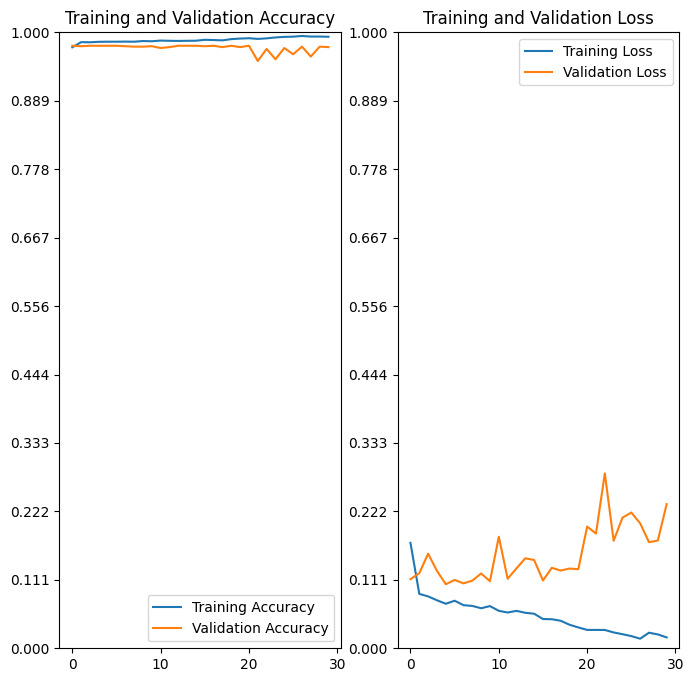

In [44]:
# storing training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# storing training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plotting graph against accuracies
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.yticks(np.linspace(0,1,10))
#plotting graph against losses
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.yticks(np.linspace(0,1,10))
plt.show()

**As we can see that after applying the augumentation the model has improved a lot**
- Achieving training accuracy of 99% from the last epoch and validation accuracy of 97%

- also it is observed that th losses have also decreased for both

- since there is not much variation betweent the two accuracies hence ther problem of overfitting is resolved.

- the class imbalance was handled by the augumentation and it improvised the results a lot

## Concluding results here

- At first we started with a basic model which lead to highly overfit data
- we tried to resolve it by applying augumentation strategies like rotation, zoom and flip, it improved the variation between the train and validation accuracies but the overall accuracy dropped a lot

- another model with dropouts was introduced along with the augmentation it did help to gget rid of redundencies
- till this time the performance was not good but the overfitting was not a detectible problem

- so to improvise, we looked into the class distribution in the dataset, it was found that there is imbalance in the dataframe.
- to resolve this 500 more instances were added to the existing images to overcome the data imbalance
- because of class rebalance to which model got an equal chance in learnig about each class
- and in the final result we can see that the training and validation accuracies have gone 99% and 97% respectively, also the losses have reduced.
Concluding the final model